In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

from manoFunkcijos import pout

In [2]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [3]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""SELECT
lytis, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2014N 
GROUP BY lytis;"""
C.execute(sql)
ans = C.fetchall()
lytis, bdusp = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |      F       |6,6,6,13.33,10|
| 1 |      M       |6,11.33,6,6,6.|


In [5]:
len(bdusp)

2

In [6]:
#  numpy fromstring
bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)
print(bduspII)

[array([   6.,    6.,    6., ..., 3670., 4212., 4218.]), array([   6.  ,   11.33,    6.  , ..., 3246.  , 3819.67, 2324.  ])]


In [7]:
txt = '3.25,4.25,7.11,10'
s = np.fromstring(txt, sep=',')
print(s)

[ 3.25  4.25  7.11 10.  ]


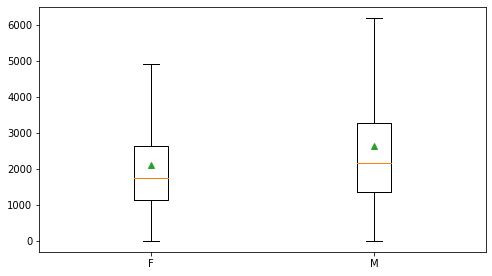

In [12]:
# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(bduspII, showmeans=True, showfliers=False)

axis.set_xticklabels(lytis)

plt.show()

In [ ]:
# parodykite su boxplot atlyginimų pasiskirstymus nuo amžiaus grupės 2018 metams (vyrams ir moterims atskirai).
# Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 2018 metams (visiems respondentams)